In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.metrics import roc_curve
from sklearn import metrics

In [2]:
df = pd.read_csv('praram9_selected_1000_w_org_ratio.csv')
Thresholdfile2 = pd.read_csv('threshold_ab_10502_cardio90_correct.csv')
Thresholdfile1 = pd.read_csv('threshold_ab10502_tb105e.csv')
Thresholdfile3 = pd.read_csv('threshold_tuberculosis.csv')
GT = pd.read_csv('nipple_marker_raw.csv')

In [3]:
GT['Lung Opacity'] = GT['Lung Opacity']+GT['Consolidation']+GT['Infiltration']
GT['Lung Opacity_Minimal'] = GT['Lung Opacity_Minimal']+GT['Consolidation_Minimal']+GT['Infiltration_Minimal']
L = []
Lm = []
for i in GT['Lung Opacity'] :
    if i == 0.0 :
        L.append(0.0)
    else :
        L.append(1.0)
for index,row in GT[['Lung Opacity_Minimal']].iterrows():
    if row[0]!= 0:
        if row[0] == GT.iloc[index]['Lung Opacity'] :
            Lm.append(1.0)
        else :
            Lm.append(0.0)
    else :
        Lm.append(0.0)
GT['Lung Opacity_Minimal'] = Lm
GT['Lung Opacity'] = L 

In [4]:
GT[(GT['Lung Opacity_Minimal']==1.0)&(GT['Lung Opacity']==0.0)]

,Image Index,Atelectasis,Atelectasis_Minimal,Cardiomegaly,Cardiomegaly_Minimal,Consolidation,Consolidation_Minimal,Edema,Edema_Minimal,Exclude,...,Lung Opacity_Minimal,Mass,Mass_Minimal,Nipple Marker,Nodule,Nodule_Minimal,Pleural Effusion,Pleural Effusion_Minimal,Tuberculosis,Tuberculosis_Minimal


In [5]:
GT.columns

Index(['Image Index', 'Atelectasis', 'Atelectasis_Minimal', 'Cardiomegaly',
       'Cardiomegaly_Minimal', 'Consolidation', 'Consolidation_Minimal',
       'Edema', 'Edema_Minimal', 'Exclude', 'Fibrosis', 'Fibrosis_Minimal',
       'Infiltration', 'Infiltration_Minimal', 'Lung Opacity',
       'Lung Opacity_Minimal', 'Mass', 'Mass_Minimal', 'Nipple Marker',
       'Nodule', 'Nodule_Minimal', 'Pleural Effusion',
       'Pleural Effusion_Minimal', 'Tuberculosis', 'Tuberculosis_Minimal'],
      dtype='object')

In [6]:
Thresholdfile = pd.merge(Thresholdfile1,Thresholdfile2,how = 'outer', on = 'Disease')
Thresholdfile = pd.merge(Thresholdfile,Thresholdfile3,how = 'outer', on = 'Disease')
Thresholdfile.dropna(axis = 1,inplace = True)
Thresholdfile.rename({'Prob Threshold_x':'Prob Threshold','Confidence Threshold_x':'Confidence Threshold'},
                     axis = 'columns', inplace = True)

Thresholdfile['Disease'].replace('Inspectra Lung Opacity v1','Lung Opacity',inplace= True)
Thresholdfile.set_index('Disease',inplace = True)

In [7]:
df.set_index('Image Index',inplace = True)

In [8]:
L = [] 
for i in range(200) : 
               L.append('Task1370'+'Page'+ str(i))
for i in range(200,400) : 
               L.append('Task1371'+'Page'+ str(i))               
for i in range(400,600) : 
               L.append('Task1372'+'Page'+ str(i))
for i in range(600,800) : 
               L.append('Task1373'+'Page'+ str(i)) 
for i in range(800,1000) : 
               L.append('Task1374'+'Page'+ str(i))
df['Page in CVAT'] = L 

In [9]:
GT = GT[['Image Index','Atelectasis_Minimal','Cardiomegaly_Minimal','Edema_Minimal','Lung Opacity_Minimal',
         'Mass_Minimal','Nodule_Minimal','Pleural Effusion_Minimal','Tuberculosis_Minimal',
         'Atelectasis','Cardiomegaly','Edema','Lung Opacity',
         'Mass','Nodule','Pleural Effusion','Tuberculosis','Nipple Marker']]
df = df.drop(['Atelectasis','Cardiomegaly','Edema','Lung Opacity',
              'Mass','Nodule','Pleural Effusion','Tuberculosis'],axis = 1)

In [10]:
df.columns

Index(['Accession Number', 'Acquisition Date', 'Month', 'PID',
       'Inspectra Lung Opacity v1 Balanced Score', 'Mass Balanced Score',
       'Nodule Balanced Score', 'Edema Balanced Score',
       'Atelectasis Balanced Score', 'Cardiomegaly Balanced Score',
       'Pleural Effusion Balanced Score', 'Tuberculosis Balanced Score',
       'PID Index', 'Reports', 'Consolidation', 'Infiltration',
       'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Inspectra Lung Opacity v1', 'New Normal', 'Page in CVAT'],
      dtype='object')

In [11]:
GT.columns

Index(['Image Index', 'Atelectasis_Minimal', 'Cardiomegaly_Minimal',
       'Edema_Minimal', 'Lung Opacity_Minimal', 'Mass_Minimal',
       'Nodule_Minimal', 'Pleural Effusion_Minimal', 'Tuberculosis_Minimal',
       'Atelectasis', 'Cardiomegaly', 'Edema', 'Lung Opacity', 'Mass',
       'Nodule', 'Pleural Effusion', 'Tuberculosis', 'Nipple Marker'],
      dtype='object')

In [12]:
L = [] 
for i in GT['Image Index']: 
    i = i+'.png'
    L.append(i)
GT['Image Index'] = L 

In [13]:
GT.set_index('Image Index',inplace = True)

In [14]:
df = pd.merge(df,GT,how = 'outer', right_index = True, left_index = True)

In [15]:
df.columns

Index(['Accession Number', 'Acquisition Date', 'Month', 'PID',
       'Inspectra Lung Opacity v1 Balanced Score', 'Mass Balanced Score',
       'Nodule Balanced Score', 'Edema Balanced Score',
       'Atelectasis Balanced Score', 'Cardiomegaly Balanced Score',
       'Pleural Effusion Balanced Score', 'Tuberculosis Balanced Score',
       'PID Index', 'Reports', 'Consolidation', 'Infiltration',
       'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Inspectra Lung Opacity v1', 'New Normal', 'Page in CVAT',
       'Atelectasis_Minimal', 'Cardiomegaly_Minimal', 'Edema_Minimal',
       'Lung Opacity_Minimal', 'Mass_Minimal', 'Nodule_Minimal',
       'Pleural Effusion_Minimal', 'Tuberculosis_Minimal', 'Atelectasis',
       'Cardiomegaly', 'Edema', 'Lung Opacity', 'Mass', 'Nodule',
       'Pleural Effusion', 'Tuberculosis', 'Nipple Marker'],
      dtype='object')

In [16]:
df['Lung Opacity Balanced Score'] = df['Inspectra Lung Opacity v1 Balanced Score']
df.drop('Inspectra Lung Opacity v1 Balanced Score',axis = 1 , inplace = True)

In [17]:
# dfminimal, dfsig
dfm = df[df['Atelectasis_Minimal']+df['Cardiomegaly_Minimal']+df['Edema_Minimal']+df['Lung Opacity_Minimal']+
         df['Mass_Minimal']+df['Nodule_Minimal']+df['Pleural Effusion_Minimal']+df['Tuberculosis_Minimal']!= 0 ]
dfsig = df[df['Atelectasis_Minimal']+df['Cardiomegaly_Minimal']+df['Edema_Minimal']+df['Lung Opacity_Minimal']+
         df['Mass_Minimal']+df['Nodule_Minimal']+df['Pleural Effusion_Minimal']+df['Tuberculosis_Minimal']== 0 ]

In [18]:
# create significant column , 1.0 = significant , 2.0 = minimal , 0.0 = no lesion 
diseases = [ 'Lung Opacity','Mass','Nodule','Edema','Atelectasis',
            'Cardiomegaly','Pleural Effusion','Tuberculosis']
for i in diseases : 
    df[i+'_sig'] = df[i]+df[i+'_Minimal']

In [19]:
 # Create Predited column by AI for all opacity and abnormality
sdf = df[['Lung Opacity Balanced Score','Mass Balanced Score',
           'Nodule Balanced Score',
           'Atelectasis Balanced Score',
           'Pleural Effusion Balanced Score','Tuberculosis Balanced Score']]
bL = []
for index, row in sdf.iterrows() :
    if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Pleural Effusion']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
         bL.append(1.0)
    else :
         bL.append(0.0)
df['Opacity Predicted by AI'] = bL 
    
sdf = df[['Lung Opacity Balanced Score','Mass Balanced Score',
               'Nodule Balanced Score','Edema Balanced Score',
               'Atelectasis Balanced Score','Cardiomegaly Balanced Score',
               'Pleural Effusion Balanced Score','Tuberculosis Balanced Score']]
bL = []
for index, row in sdf.iterrows() :
    if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Edema']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Cardiomegaly']['Confidence Threshold'] or row[6] >= Thresholdfile.loc['Pleural Effusion']['Confidence Threshold'] or row[7] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
        bL.append(1.0)
    else :
        bL.append(0.0)
df['Abnormal Predicted by AI'] = bL 
    
    

In [20]:
dfwNM = df[df['Nipple Marker']==1.0]
dfwoNM = df[df['Nipple Marker']==0.0]
dfmwoNM = dfwoNM[dfwoNM['Atelectasis_Minimal']+dfwoNM['Cardiomegaly_Minimal']+dfwoNM['Edema_Minimal']+dfwoNM['Lung Opacity_Minimal']+
dfwoNM['Mass_Minimal']+dfwoNM['Nodule_Minimal']+dfwoNM['Pleural Effusion_Minimal']+dfwoNM['Tuberculosis_Minimal']!= 0 ]
dfsigwoNM = dfwoNM[df['Atelectasis_Minimal']+dfwoNM['Cardiomegaly_Minimal']+dfwoNM['Edema_Minimal']+dfwoNM['Lung Opacity_Minimal']+
dfwoNM['Mass_Minimal']+dfwoNM['Nodule_Minimal']+dfwoNM['Pleural Effusion_Minimal']+dfwoNM['Tuberculosis_Minimal']== 0 ]

/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2698/782499168.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfsigwoNM = dfwoNM[df['Atelectasis_Minimal']+dfwoNM['Cardiomegaly_Minimal']+dfwoNM['Edema_Minimal']+dfwoNM['Lung Opacity_Minimal']+


In [21]:
GT.columns

Index(['Atelectasis_Minimal', 'Cardiomegaly_Minimal', 'Edema_Minimal',
       'Lung Opacity_Minimal', 'Mass_Minimal', 'Nodule_Minimal',
       'Pleural Effusion_Minimal', 'Tuberculosis_Minimal', 'Atelectasis',
       'Cardiomegaly', 'Edema', 'Lung Opacity', 'Mass', 'Nodule',
       'Pleural Effusion', 'Tuberculosis', 'Nipple Marker'],
      dtype='object')

In [22]:
GT.columns

Index(['Atelectasis_Minimal', 'Cardiomegaly_Minimal', 'Edema_Minimal',
       'Lung Opacity_Minimal', 'Mass_Minimal', 'Nodule_Minimal',
       'Pleural Effusion_Minimal', 'Tuberculosis_Minimal', 'Atelectasis',
       'Cardiomegaly', 'Edema', 'Lung Opacity', 'Mass', 'Nodule',
       'Pleural Effusion', 'Tuberculosis', 'Nipple Marker'],
      dtype='object')

In [23]:
def TP(df,scorecolumn,GTcolumn,Threshold):
    T = df[(df[scorecolumn]>= Threshold)&(df[GTcolumn]==1.0)]
    return T
def FN(df,scorecolumn,GTcolumn,Threshold) :
    F = df[(df[scorecolumn]< Threshold)&(df[GTcolumn]==1.0)]
    return F 
def FP(df,scorecolumn,GTcolumn,Threshold):
    F = df[(df[scorecolumn]>= Threshold)&(df[GTcolumn]==0.0)]
    return F 
def TN(df,scorecolumn,GTcolumn,Threshold):
    T = df[(df[scorecolumn]<Threshold)&(df[GTcolumn]==0.0)]
    return T 
def sensitivity(df,scorecolumn,GTcolumn,Threshold) :
    T = len(TP(df,scorecolumn,GTcolumn,Threshold))
    F = len(FN(df,scorecolumn,GTcolumn,Threshold))
    sense = T/(T+F)
    return sense
def specificity(df,scorecolumn,GTcolumn,Threshold) :
    T = len(TN(df,scorecolumn,GTcolumn,Threshold))
    F = len(FP(df,scorecolumn,GTcolumn,Threshold))
    spec = T/(T+F)
    return spec

In [24]:
sensitivity(dfwoNM,'Nodule Balanced Score','Nodule',Thresholdfile.loc['Nodule']['Confidence Threshold'])

0.7

In [25]:
df.columns

Index(['Accession Number', 'Acquisition Date', 'Month', 'PID',
       'Mass Balanced Score', 'Nodule Balanced Score', 'Edema Balanced Score',
       'Atelectasis Balanced Score', 'Cardiomegaly Balanced Score',
       'Pleural Effusion Balanced Score', 'Tuberculosis Balanced Score',
       'PID Index', 'Reports', 'Consolidation', 'Infiltration',
       'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Inspectra Lung Opacity v1', 'New Normal', 'Page in CVAT',
       'Atelectasis_Minimal', 'Cardiomegaly_Minimal', 'Edema_Minimal',
       'Lung Opacity_Minimal', 'Mass_Minimal', 'Nodule_Minimal',
       'Pleural Effusion_Minimal', 'Tuberculosis_Minimal', 'Atelectasis',
       'Cardiomegaly', 'Edema', 'Lung Opacity', 'Mass', 'Nodule',
       'Pleural Effusion', 'Tuberculosis', 'Nipple Marker',
       'Lung Opacity Balanced Score', 'Lung Opacity_sig', 'Mass_sig',
       'Nodule_sig', 'Edema_sig', 'Atelectasis_sig', 'Cardiomegaly_sig',
       'Pleural Effusion_sig', 'Tuberculosis_sig',

In [26]:
# Creat table 
def Createtable(df):
    diseases = [ 'Lung Opacity','Mass','Nodule','Edema','Atelectasis',
            'Cardiomegaly','Pleural Effusion','Tuberculosis']
    Positive = []
    AUC = [] 
    PPV = []
    NPV = [] 
    Sensitivity = []
    Specificity = [] 
    TPn = [] 
    TNn = [] 
    FPn = [] 
    FNn = [] 
    for i in diseases :
        TPL = len(TP(df,i+' Balanced Score',i,Thresholdfile.loc[i]['Confidence Threshold']))
        FPL = len(FP(df,i+' Balanced Score',i,Thresholdfile.loc[i]['Confidence Threshold']))
        FNL = len(FN(df,i+' Balanced Score',i,Thresholdfile.loc[i]['Confidence Threshold']))
        TNL = len(TN(df,i+' Balanced Score',i,Thresholdfile.loc[i]['Confidence Threshold']))
        Positive.append(len(df[df[i]==1.0]))
        TPn.append(TPL)
        TNn.append(TNL)
        FPn.append(FPL)
        FNn.append(FNL)
        # check if division will not be 0 
        if (TPL + FPL) ==0 and (TNL + FNL) !=0:
            PPV.append('Can not calculate')
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
            AUC.append(metrics.roc_auc_score(df[i],df[i+' Balanced Score']))
        elif (TNL + FNL) ==0 and (TPL + FPL) !=0 :
            PPV.append(TPL/(TPL+FPL))
            NPV.append('Can not calculate')
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
            AUC.append(metrics.roc_auc_score(df[i],df[i+' Balanced Score']))
        elif (TPL + FNL)==0 :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append('Can not calculate')
            Specificity.append(TNL/(TNL+FPL))
            AUC.append('Can not calculate ')
        elif (TNL + FPL)==0  :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append('Can not calculate')
            AUC.append('Can not calculate')
        else :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
            AUC.append(metrics.roc_auc_score(df[i],df[i+' Balanced Score']))
    table = {'Positive':Positive,'AUC':AUC,'PPV':PPV,'NPV':NPV,'Sensitivity':Sensitivity,
             'Specificity':Specificity,'TP':TPn,'TN':TNn,'FP':FPn,'FN':FNn}
    table = pd.DataFrame(table)
    table.index = diseases
    table.index.name = 'Disease'
    
    # Create new column in new coppied df- ndf 
    # Opacity Group *** ndf['Abnormal Group'] = Ground truth , ndf['Predict dict by AI'] = Predicted score ]
    ndf = df
    ndf['Opacity Group'] = ndf[['Lung Opacity','Mass','Nodule','Atelectasis'
                                ,'Edema','Tuberculosis']].sum(axis = 1)
    ndf['Max Balanced Score for Opacity Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score',
                                                         'Atelectasis Balanced Score','Edema Balanced Score',
                                                         'Tuberculosis Balanced Score']].max(axis = 1)    
    aL = [] 
    for i in ndf['Opacity Group']:
        if i != 0.0 :
            aL.append(1.0)
        else :
            aL.append(0.0)
    ndf['Opacity Group'] = aL
    sdf = ndf[['Lung Opacity Balanced Score','Mass Balanced Score',
               'Nodule Balanced Score',
               'Atelectasis Balanced Score',
               'Edema Balanced Score','Tuberculosis Balanced Score']]
    bL = []
    for index, row in sdf.iterrows() :
        if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Edema']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
            bL.append(1.0)
        else :
            bL.append(0.0)
    ndf['Predict by AI'] = bL 
    
    opPositive = len(ndf[(ndf['Opacity Group']==  1.0)])
    opTP = len(ndf[(ndf['Opacity Group']==  1.0) &(ndf['Predict by AI']==  1.0)])
    opFP = len(ndf[(ndf['Opacity Group']==  0.0) &(ndf['Predict by AI']==  1.0)])
    opTN = len(ndf[(ndf['Opacity Group']==  0.0) &(ndf['Predict by AI']==  0.0)])
    opFN = len(ndf[(ndf['Opacity Group']==  1.0) &(ndf['Predict by AI']==  0.0)])
    
    if opTP+opFP != 0 : 
        opPPV = opTP/(opTP+opFP)
    else :
        opPPV = 'Can not calculate'
    if opTP + opFN != 0 :
        opSensitivity = opTP/(opTP+opFN)
    else : 
        opSensitivity = 'Can not calculate'
    if opTN+opFN != 0 : 
        opNPV = opTN/(opTN+opFN)
    else :
        opNPV = 'Can not calculate'
    if opTN + opFP != 0 :
        opSpecificity = opTN/(opTN+opFP)
    else : 
        opSpecificity = 'Can not calculate'    
        
    opAUC = metrics.roc_auc_score(ndf['Opacity Group'],ndf['Max Balanced Score for Opacity Group'])
    
    oplist = [opPositive , opAUC , opPPV, opNPV, opSensitivity,opSpecificity,opTP,opTN,opFP,opFN ]
    table.loc['Opacity Group'] = oplist    
    

    # Create new column in new coppied df- ndf 
    # Abnormal group *** ndf['Abnormal Group'] = Ground truth , ndf['Predict dict by AI'] = Predicted score ]
    ndf = df
    ndf['Abnormal Group'] = ndf[['Lung Opacity','Mass','Nodule','Edema','Atelectasis',
                                 'Cardiomegaly','Pleural Effusion','Tuberculosis']].sum(axis = 1)
    ndf['Max Balanced Score for Abnormal Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score','Edema Balanced Score',
                                                         'Atelectasis Balanced Score','Cardiomegaly Balanced Score','Pleural Effusion Balanced Score',
                                                         'Tuberculosis Balanced Score']].max(axis = 1)    
    aL = [] 
    for i in ndf['Abnormal Group']:
        if i != 0.0 :
            aL.append(1.0)
        else :
            aL.append(0.0)
    ndf['Abnormal Group'] = aL
    sdf = ndf[['Lung Opacity Balanced Score','Mass Balanced Score',
               'Nodule Balanced Score','Edema Balanced Score',
               'Atelectasis Balanced Score','Cardiomegaly Balanced Score',
               'Pleural Effusion Balanced Score','Tuberculosis Balanced Score']]
    bL = []
    for index, row in sdf.iterrows() :
        if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Edema']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Cardiomegaly']['Confidence Threshold'] or row[6] >= Thresholdfile.loc['Pleural Effusion']['Confidence Threshold'] or row[7] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
            bL.append(1.0)
        else :
            bL.append(0.0)
    ndf['Predict by AI'] = bL 
    
    aPositive = len(ndf[(ndf['Abnormal Group']==  1.0)])
    aTP = len(ndf[(ndf['Abnormal Group']==  1.0) &(ndf['Predict by AI']==  1.0)])
    aFP = len(ndf[(ndf['Abnormal Group']==  0.0) &(ndf['Predict by AI']==  1.0)])
    aTN = len(ndf[(ndf['Abnormal Group']==  0.0) &(ndf['Predict by AI']==  0.0)])
    aFN = len(ndf[(ndf['Abnormal Group']==  1.0) &(ndf['Predict by AI']==  0.0)])
    
    if aTP+aFP != 0 : 
        aPPV = aTP/(aTP+aFP)
    else :
        aPPV = 'Can not calculate'
    if aTP + aFN != 0 :
        aSensitivity = aTP/(aTP+aFN)
    else : 
        aSensitivity = 'Can not calculate'
    if aTN+aFN != 0 : 
        aNPV = aTN/(aTN+aFN)
    else :
        aNPV = 'Can not calculate'
    if aTN + aFP != 0 :
        aSpecificity = aTN/(aTN+aFP)
    else : 
        aSpecificity = 'Can not calculate'    
        
    aAUC = metrics.roc_auc_score(ndf['Abnormal Group'],ndf['Max Balanced Score for Abnormal Group'])
    
    alist = [aPositive , aAUC , aPPV, aNPV, aSensitivity,aSpecificity,aTP,aTN,aFP,aFN ]
    table.loc['Abnormal Group'] = alist
    return table 

In [27]:
# Creat table 
def Createtablesig(df):
    diseases = [ 'Lung Opacity','Mass','Nodule','Edema','Atelectasis',
            'Cardiomegaly','Pleural Effusion','Tuberculosis']
    Positive = []
    AUC = [] 
    PPV = []
    NPV = [] 
    Sensitivity = []
    Specificity = [] 
    TPn = [] 
    TNn = [] 
    FPn = [] 
    FNn = [] 
    for i in diseases :
        TPL = len(TP(df,i+' Balanced Score',i+'_sig',Thresholdfile.loc[i]['Confidence Threshold']))
        FPL = len(FP(df,i+' Balanced Score',i+'_sig',Thresholdfile.loc[i]['Confidence Threshold']))
        FNL = len(FN(df,i+' Balanced Score',i+'_sig',Thresholdfile.loc[i]['Confidence Threshold']))
        TNL = len(TN(df,i+' Balanced Score',i+'_sig',Thresholdfile.loc[i]['Confidence Threshold']))
        Positive.append(len(df[df[i+'_sig']==1.0]))
        TPn.append(TPL)
        TNn.append(TNL)
        FPn.append(FPL)
        FNn.append(FNL)
        # check if division will not be 0 
        if (TPL + FPL) ==0 and (TNL + FNL) !=0:
            PPV.append('Can not calculate')
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
            AUC.append(metrics.roc_auc_score(df[df[i+'_sig']<2.0][i+'_sig'],df[df[i+'_sig']<2.0][i+' Balanced Score']))
        elif (TNL + FNL) ==0 and (TPL + FPL) !=0 :
            PPV.append(TPL/(TPL+FPL))
            NPV.append('Can not calculate')
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
            AUC.append(metrics.roc_auc_score(df[df[i+'_sig']<2.0][i+'_sig'],df[df[i+'_sig']<2.0][i+' Balanced Score']))
        elif (TPL + FNL)==0 :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append('Can not calculate')
            Specificity.append(TNL/(TNL+FPL))
            AUC.append('Can not calculate ')
        elif (TNL + FPL)==0  :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append('Can not calculate')
            AUC.append('Can not calculate')
        else :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
            AUC.append(metrics.roc_auc_score(df[df[i+'_sig']<2.0][i+'_sig'],df[df[i+'_sig']<2.0][i+' Balanced Score']))
    table = {'Positive':Positive,'AUC':AUC,'PPV':PPV,'NPV':NPV,'Sensitivity':Sensitivity,
             'Specificity':Specificity,'TP':TPn,'TN':TNn,'FP':FPn,'FN':FNn}
    table = pd.DataFrame(table)
    table.index = diseases
    table.index.name = 'Disease'
    
    # Create new column in new coppied df- ndf 
    # Opacity Group *** ndf['Abnormal Group'] = Ground truth , ndf['Predict dict by AI'] = Predicted score ]
    ndf = df
    x = ndf[['Lung Opacity_sig','Mass_sig','Nodule_sig','Atelectasis_sig'
             ,'Edema_sig','Tuberculosis_sig']]
    aL = []
    for index,row in x.iterrows():
        if (row == 1.0).any() :
            aL.append(1.0)
        elif (row == 2.0).any() :
            aL.append(2.0)
        else :
            aL.append(0.0)

    ndf['Opacity Group'] = aL 
    
    ndf['Max Balanced Score for Opacity Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score',
                                                         'Atelectasis Balanced Score','Edema Balanced Score',
                                                         'Tuberculosis Balanced Score']].max(axis = 1)    
    sdf = ndf[['Lung Opacity Balanced Score','Mass Balanced Score',
               'Nodule Balanced Score',
               'Atelectasis Balanced Score',
               'Edema Balanced Score','Tuberculosis Balanced Score']]
    bL = []
    for index, row in sdf.iterrows() :
        if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Edema']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
            bL.append(1.0)
        else :
            bL.append(0.0)
    ndf['Predict by AI'] = bL 
    
    opPositive = len(ndf[(ndf['Opacity Group']==  1.0)])
    opTP = len(ndf[(ndf['Opacity Group']==  1.0) &(ndf['Predict by AI']==  1.0)])
    opFP = len(ndf[(ndf['Opacity Group']==  0.0) &(ndf['Predict by AI']==  1.0)])
    opTN = len(ndf[(ndf['Opacity Group']==  0.0) &(ndf['Predict by AI']==  0.0)])
    opFN = len(ndf[(ndf['Opacity Group']==  1.0) &(ndf['Predict by AI']==  0.0)])
    
    if opTP+opFP != 0 : 
        opPPV = opTP/(opTP+opFP)
    else :
        opPPV = 'Can not calculate'
    if opTP + opFN != 0 :
        opSensitivity = opTP/(opTP+opFN)
    else : 
        opSensitivity = 'Can not calculate'
    if opTN+opFN != 0 : 
        opNPV = opTN/(opTN+opFN)
    else :
        opNPV = 'Can not calculate'
    if opTN + opFP != 0 :
        opSpecificity = opTN/(opTN+opFP)
    else : 
        opSpecificity = 'Can not calculate'    
        
    opAUC = metrics.roc_auc_score(ndf[ndf['Opacity Group']<2.0]['Opacity Group'],ndf[ndf['Opacity Group']<2.0]['Max Balanced Score for Opacity Group'])
    
    oplist = [opPositive , opAUC , opPPV, opNPV, opSensitivity,opSpecificity,opTP,opTN,opFP,opFN ]
    table.loc['Opacity Group'] = oplist    
    

    # Create new column in new coppied df- ndf 
    # Abnormal group *** ndf['Abnormal Group'] = Ground truth , ndf['Predict dict by AI'] = Predicted score ]
    ndf = df
    x = ndf[['Lung Opacity_sig','Mass_sig','Nodule_sig','Edema_sig','Atelectasis_sig',
               'Cardiomegaly_sig','Pleural Effusion_sig','Tuberculosis_sig']]
    aL = []
    for index,row in x.iterrows():
        if (row == 1.0).any() :
            aL.append(1.0)
        elif (row == 2.0).any() :
            aL.append(2.0)
        else :
            aL.append(0.0)
    ndf['Abnormal Group'] = aL 

    ndf['Max Balanced Score for Abnormal Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score','Edema Balanced Score',
                                                         'Atelectasis Balanced Score','Cardiomegaly Balanced Score','Pleural Effusion Balanced Score',
                                                         'Tuberculosis Balanced Score']].max(axis = 1)    
    sdf = ndf[['Lung Opacity Balanced Score','Mass Balanced Score',
               'Nodule Balanced Score','Edema Balanced Score',
               'Atelectasis Balanced Score','Cardiomegaly Balanced Score',
               'Pleural Effusion Balanced Score','Tuberculosis Balanced Score']]
    bL = []
    for index, row in sdf.iterrows() :
        if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Edema']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Cardiomegaly']['Confidence Threshold'] or row[6] >= Thresholdfile.loc['Pleural Effusion']['Confidence Threshold'] or row[7] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
            bL.append(1.0)
        else :
            bL.append(0.0)
    ndf['Predict by AI'] = bL 
    
    aPositive = len(ndf[(ndf['Abnormal Group']==  1.0)])
    aTP = len(ndf[(ndf['Abnormal Group']==  1.0) &(ndf['Predict by AI']==  1.0)])
    aFP = len(ndf[(ndf['Abnormal Group']==  0.0) &(ndf['Predict by AI']==  1.0)])
    aTN = len(ndf[(ndf['Abnormal Group']==  0.0) &(ndf['Predict by AI']==  0.0)])
    aFN = len(ndf[(ndf['Abnormal Group']==  1.0) &(ndf['Predict by AI']==  0.0)])
    
    if aTP+aFP != 0 : 
        aPPV = aTP/(aTP+aFP)
    else :
        aPPV = 'Can not calculate'
    if aTP + aFN != 0 :
        aSensitivity = aTP/(aTP+aFN)
    else : 
        aSensitivity = 'Can not calculate'
    if aTN+aFN != 0 : 
        aNPV = aTN/(aTN+aFN)
    else :
        aNPV = 'Can not calculate'
    if aTN + aFP != 0 :
        aSpecificity = aTN/(aTN+aFP)
    else : 
        aSpecificity = 'Can not calculate'    
        
    aAUC = metrics.roc_auc_score(ndf[ndf['Abnormal Group']<2]['Abnormal Group'],ndf[ndf['Abnormal Group']<2]['Max Balanced Score for Abnormal Group'])
    
    alist = [aPositive , aAUC , aPPV, aNPV, aSensitivity,aSpecificity,aTP,aTN,aFP,aFN ]
    table.loc['Abnormal Group'] = alist
    return table 

In [28]:
# Creat table 
def Createtable_relax(df):
    diseases = ['Lung Opacity','Mass','Nodule','Edema','Atelectasis'
                ,'Tuberculosis']
    Positive = [] 
    PPV = []
    NPV = [] 
    Sensitivity = []
    Specificity = []
    TPn = [] 
    TNn = [] 
    FPn = [] 
    FNn = [] 
    for i in diseases :
        TPL = len(df[(df['Opacity Predicted by AI']==1.0)&(df[i]==1.0)])
        FPL = len(df[(df['Opacity Predicted by AI']==1.0)&(df[i]==0.0)])
        FNL = len(df[(df['Opacity Predicted by AI']==0.0)&(df[i]==1.0)])
        TNL = len(df[(df['Opacity Predicted by AI']==0.0)&(df[i]==0.0)])
        Positive.append(len(df[df[i]==1.0]))
        TPn.append(TPL)
        TNn.append(TNL)
        FPn.append(FPL)
        FNn.append(FNL)
        # check if division will not be 0 
        if (TPL + FPL) ==0 and (TNL + FNL) !=0:
            PPV.append('Can not calculate')
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
        elif (TNL + FNL) ==0 and (TPL + FPL) !=0 :
            PPV.append(TPL/(TPL+FPL))
            NPV.append('Can not calculate')
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
        elif (TPL + FNL)==0 :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append('Can not calculate')
            Specificity.append(TNL/(TNL+FPL))
        elif (TNL + FPL)==0  :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append('Can not calculate')

        else :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
    table = {'Positive':Positive,'PPV':PPV,'NPV':NPV,'Sensitivity':Sensitivity,
             'Specificity':Specificity,'TP':TPn,'TN':TNn,'FP':FPn,'FN':FNn}
    table = pd.DataFrame(table)
    table.index = diseases
    table.index.name = 'Disease'
    
    # Create new column in new coppied df- ndf 
    # Opacity Group *** ndf['Abnormal Group'] = Ground truth , ndf['Predict dict by AI'] = Predicted score ]
    ndf = df
    ndf['Opacity Group'] = ndf[['Lung Opacity','Mass','Nodule','Edema','Atelectasis'
                                ,'Tuberculosis']].sum(axis = 1)
    ndf['Max Balanced Score for Opacity Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score',
                                                        'Edema Balanced Score','Atelectasis Balanced Score',
                                                         'Tuberculosis Balanced Score']].max(axis = 1)    
    aL = [] 
    for i in ndf['Opacity Group']:
        if i != 0.0 :
            aL.append(1.0)
        else :
            aL.append(0.0)
    ndf['Opacity Group'] = aL
    sdf = ndf[['Lung Opacity Balanced Score','Mass Balanced Score',
               'Nodule Balanced Score','Edema Balanced Score',
               'Atelectasis Balanced Score','Tuberculosis Balanced Score']]
    bL = []
    for index, row in sdf.iterrows() :
        if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Edema']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
            bL.append(1.0)
        else :
            bL.append(0.0)
    ndf['Predict by AI'] = bL 
    
    opPositive = len(ndf[(ndf['Opacity Group']==  1.0)])
    opTP = len(ndf[(ndf['Opacity Group']==  1.0) &(ndf['Predict by AI']==  1.0)])
    opFP = len(ndf[(ndf['Opacity Group']==  0.0) &(ndf['Predict by AI']==  1.0)])
    opTN = len(ndf[(ndf['Opacity Group']==  0.0) &(ndf['Predict by AI']==  0.0)])
    opFN = len(ndf[(ndf['Opacity Group']==  1.0) &(ndf['Predict by AI']==  0.0)])
    
    if opTP+opFP != 0 : 
        opPPV = opTP/(opTP+opFP)
    else :
        opPPV = 'Can not calculate'
    if opTP + opFN != 0 :
        opSensitivity = opTP/(opTP+opFN)
    else : 
        opSensitivity = 'Can not calculate'
    if opTN+opFN != 0 : 
        opNPV = opTN/(opTN+opFN)
    else :
        opNPV = 'Can not calculate'
    if opTN + opFP != 0 :
        opSpecificity = opTN/(opTN+opFP)
    else : 
        opSpecificity = 'Can not calculate'    
        
    opAUC = metrics.roc_auc_score(ndf['Opacity Group'],ndf['Max Balanced Score for Opacity Group'])
    
    oplist = [opPositive , opPPV, opNPV, opSensitivity,opSpecificity,opTP,opTN,opFP,opFN ]
    table.loc['Opacity Group'] = oplist    
    

    # Create new column in new coppied df- ndf 
    # Abnormal group *** ndf['Abnormal Group'] = Ground truth , ndf['Predict dict by AI'] = Predicted score ]
    ndf = df
    ndf['Abnormal Group'] = ndf[['Lung Opacity','Mass','Nodule','Edema','Atelectasis',
                                 'Cardiomegaly','Pleural Effusion','Tuberculosis']].sum(axis = 1)
    ndf['Max Balanced Score for Abnormal Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score','Edema Balanced Score',
                                                         'Atelectasis Balanced Score','Cardiomegaly Balanced Score','Pleural Effusion Balanced Score',
                                                         'Tuberculosis Balanced Score']].max(axis = 1)    
    aL = [] 
    for i in ndf['Abnormal Group']:
        if i != 0.0 :
            aL.append(1.0)
        else :
            aL.append(0.0)
    ndf['Abnormal Group'] = aL
    sdf = ndf[['Lung Opacity Balanced Score','Mass Balanced Score',
               'Nodule Balanced Score','Edema Balanced Score',
               'Atelectasis Balanced Score','Cardiomegaly Balanced Score',
               'Pleural Effusion Balanced Score','Tuberculosis Balanced Score']]
    bL = []
    for index, row in sdf.iterrows() :
        if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Edema']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Cardiomegaly']['Confidence Threshold'] or row[6] >= Thresholdfile.loc['Pleural Effusion']['Confidence Threshold'] or row[7] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
            bL.append(1.0)
        else :
            bL.append(0.0)
    ndf['Predict by AI'] = bL 
    
    aPositive = len(ndf[(ndf['Abnormal Group']==  1.0)])
    aTP = len(ndf[(ndf['Abnormal Group']==  1.0) &(ndf['Predict by AI']==  1.0)])
    aFP = len(ndf[(ndf['Abnormal Group']==  0.0) &(ndf['Predict by AI']==  1.0)])
    aTN = len(ndf[(ndf['Abnormal Group']==  0.0) &(ndf['Predict by AI']==  0.0)])
    aFN = len(ndf[(ndf['Abnormal Group']==  1.0) &(ndf['Predict by AI']==  0.0)])
    
    if aTP+aFP != 0 : 
        aPPV = aTP/(aTP+aFP)
    else :
        aPPV = 'Can not calculate'
    if aTP + aFN != 0 :
        aSensitivity = aTP/(aTP+aFN)
    else : 
        aSensitivity = 'Can not calculate'
    if aTN+aFN != 0 : 
        aNPV = aTN/(aTN+aFN)
    else :
        aNPV = 'Can not calculate'
    if aTN + aFP != 0 :
        aSpecificity = aTN/(aTN+aFP)
    else : 
        aSpecificity = 'Can not calculate'    
        
    aAUC = metrics.roc_auc_score(ndf['Abnormal Group'],ndf['Max Balanced Score for Abnormal Group'])
    
    alist = [aPositive , aPPV, aNPV, aSensitivity,aSpecificity,aTP,aTN,aFP,aFN ]
    table.loc['Abnormal Group'] = alist
    return table 

In [29]:
# Creat table 
def Createtable_relax_sig(df):
    diseases = [ 'Lung Opacity','Mass','Nodule','Edema'
                ,'Atelectasis','Tuberculosis']
    Positive = []
    PPV = []
    NPV = [] 
    Sensitivity = []
    Specificity = [] 
    TPn = [] 
    TNn = [] 
    FPn = [] 
    FNn = [] 
    for i in diseases :
        TPL = len(df[(df['Opacity Predicted by AI']==1.0)&(df[i+'_sig']==1.0)])
        FPL = len(df[(df['Opacity Predicted by AI']==1.0)&(df[i+'_sig']==0.0)])
        FNL = len(df[(df['Opacity Predicted by AI']==0.0)&(df[i+'_sig']==1.0)])
        TNL = len(df[(df['Opacity Predicted by AI']==0.0)&(df[i+'_sig']==0.0)])
        Positive.append(len(df[df[i+'_sig']==1.0]))
        TPn.append(TPL)
        TNn.append(TNL)
        FPn.append(FPL)
        FNn.append(FNL)
        # check if division will not be 0 
        if (TPL + FPL) ==0 and (TNL + FNL) !=0:
            PPV.append('Can not calculate')
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
        elif (TNL + FNL) ==0 and (TPL + FPL) !=0 :
            PPV.append(TPL/(TPL+FPL))
            NPV.append('Can not calculate')
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
        elif (TPL + FNL)==0 :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append('Can not calculate')
            Specificity.append(TNL/(TNL+FPL))
        elif (TNL + FPL)==0  :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append('Can not calculate')
        else :
            PPV.append(TPL/(TPL+FPL))
            NPV.append(TNL/(TNL+FNL))
            Sensitivity.append(TPL/(TPL+FNL))
            Specificity.append(TNL/(TNL+FPL))
    table = {'Positive':Positive,'PPV':PPV,'NPV':NPV,'Sensitivity':Sensitivity,
             'Specificity':Specificity,'TP':TPn,'TN':TNn,'FP':FPn,'FN':FNn}
    table = pd.DataFrame(table)
    table.index = diseases
    table.index.name = 'Disease'
    
    # Create new column in new coppied df- ndf 
    # Opacity Group *** ndf['Abnormal Group'] = Ground truth , ndf['Predict dict by AI'] = Predicted score ]
    ndf = df
    x = ndf[['Lung Opacity_sig','Mass_sig','Nodule_sig','Edema_sig'
             ,'Atelectasis_sig','Tuberculosis_sig']]
    aL = []
    for index,row in x.iterrows():
        if (row == 1.0).any() :
            aL.append(1.0)
        elif (row == 2.0).any() :
            aL.append(2.0)
        else :
            aL.append(0.0)

    ndf['Opacity Group'] = aL 
    
    ndf['Max Balanced Score for Opacity Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score',
                                                         'Edema Balanced Score','Atelectasis Balanced Score',
                                                         'Tuberculosis Balanced Score']].max(axis = 1)    
    sdf = ndf[['Lung Opacity Balanced Score','Mass Balanced Score',
               'Nodule Balanced Score',
               'Edema Balanced Score',
               'Atelectasis Balanced Score','Tuberculosis Balanced Score']]
    bL = []
    for index, row in sdf.iterrows() :
        if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Edema']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
            bL.append(1.0)
        else :
            bL.append(0.0)
    ndf['Predict by AI'] = bL 
    
    opPositive = len(ndf[(ndf['Opacity Group']==  1.0)])
    opTP = len(ndf[(ndf['Opacity Group']==  1.0) &(ndf['Predict by AI']==  1.0)])
    opFP = len(ndf[(ndf['Opacity Group']==  0.0) &(ndf['Predict by AI']==  1.0)])
    opTN = len(ndf[(ndf['Opacity Group']==  0.0) &(ndf['Predict by AI']==  0.0)])
    opFN = len(ndf[(ndf['Opacity Group']==  1.0) &(ndf['Predict by AI']==  0.0)])
    
    if opTP+opFP != 0 : 
        opPPV = opTP/(opTP+opFP)
    else :
        opPPV = 'Can not calculate'
    if opTP + opFN != 0 :
        opSensitivity = opTP/(opTP+opFN)
    else : 
        opSensitivity = 'Can not calculate'
    if opTN+opFN != 0 : 
        opNPV = opTN/(opTN+opFN)
    else :
        opNPV = 'Can not calculate'
    if opTN + opFP != 0 :
        opSpecificity = opTN/(opTN+opFP)
    else : 
        opSpecificity = 'Can not calculate'    
        
    opAUC = metrics.roc_auc_score(ndf[ndf['Opacity Group']<2]['Opacity Group'],ndf[ndf['Opacity Group']<2]['Max Balanced Score for Opacity Group'])
    
    oplist = [opPositive , opPPV, opNPV, opSensitivity,opSpecificity,opTP,opTN,opFP,opFN ]
    table.loc['Opacity Group'] = oplist    
    

    # Create new column in new coppied df- ndf 
    # Abnormal group *** ndf['Abnormal Group'] = Ground truth , ndf['Predict dict by AI'] = Predicted score ]
    ndf = df
    x = ndf[['Lung Opacity_sig','Mass_sig','Nodule_sig','Edema_sig','Atelectasis_sig',
               'Cardiomegaly_sig','Pleural Effusion_sig','Tuberculosis_sig']]
    aL = []
    for index,row in x.iterrows():
        if (row == 1.0).any() :
            aL.append(1.0)
        elif (row == 2.0).any() :
            aL.append(2.0)
        else :
            aL.append(0.0)
    ndf['Abnormal Group'] = aL 

    ndf['Max Balanced Score for Abnormal Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score','Edema Balanced Score',
                                                         'Atelectasis Balanced Score','Cardiomegaly Balanced Score','Pleural Effusion Balanced Score',
                                                         'Tuberculosis Balanced Score']].max(axis = 1)    
    sdf = ndf[['Lung Opacity Balanced Score','Mass Balanced Score',
               'Nodule Balanced Score','Edema Balanced Score',
               'Atelectasis Balanced Score','Cardiomegaly Balanced Score',
               'Pleural Effusion Balanced Score','Tuberculosis Balanced Score']]
    bL = []
    for index, row in sdf.iterrows() :
        if row[0]>= Thresholdfile.loc['Lung Opacity']['Confidence Threshold'] or row[1] >= Thresholdfile.loc['Mass']['Confidence Threshold'] or row[2] >= Thresholdfile.loc['Nodule']['Confidence Threshold'] or row[3] >= Thresholdfile.loc['Edema']['Confidence Threshold'] or row[4] >= Thresholdfile.loc['Atelectasis']['Confidence Threshold'] or row[5] >= Thresholdfile.loc['Cardiomegaly']['Confidence Threshold'] or row[6] >= Thresholdfile.loc['Pleural Effusion']['Confidence Threshold'] or row[7] >= Thresholdfile.loc['Tuberculosis']['Confidence Threshold'] :        
            bL.append(1.0)
        else :
            bL.append(0.0)
    ndf['Predict by AI'] = bL 
    
    aPositive = len(ndf[(ndf['Abnormal Group']==  1.0)])
    aTP = len(ndf[(ndf['Abnormal Group']==  1.0) &(ndf['Predict by AI']==  1.0)])
    aFP = len(ndf[(ndf['Abnormal Group']==  0.0) &(ndf['Predict by AI']==  1.0)])
    aTN = len(ndf[(ndf['Abnormal Group']==  0.0) &(ndf['Predict by AI']==  0.0)])
    aFN = len(ndf[(ndf['Abnormal Group']==  1.0) &(ndf['Predict by AI']==  0.0)])
    
    if aTP+aFP != 0 : 
        aPPV = aTP/(aTP+aFP)
    else :
        aPPV = 'Can not calculate'
    if aTP + aFN != 0 :
        aSensitivity = aTP/(aTP+aFN)
    else : 
        aSensitivity = 'Can not calculate'
    if aTN+aFN != 0 : 
        aNPV = aTN/(aTN+aFN)
    else :
        aNPV = 'Can not calculate'
    if aTN + aFP != 0 :
        aSpecificity = aTN/(aTN+aFP)
    else : 
        aSpecificity = 'Can not calculate'    
        
    aAUC = metrics.roc_auc_score(ndf[ndf['Abnormal Group']<2]['Abnormal Group'],ndf[ndf['Abnormal Group']<2]['Max Balanced Score for Abnormal Group'])
    
    alist = [aPositive , aPPV, aNPV, aSensitivity,aSpecificity,aTP,aTN,aFP,aFN ]
    table.loc['Abnormal Group'] = alist
    return table 

In [30]:
def Createtablefinal(df) : 
    table = Createtable(df)
    table_relax = Createtable_relax(df)
    table['Sensitivity with Opacity relax'] = table_relax['Sensitivity']
    return table
def Createtablefinal_sig(df) : 
    table = Createtablesig(df)
    table_relax = Createtable_relax_sig(df)
    table['Sensitivity with Opacity relax'] = table_relax['Sensitivity']
    return table 

In [31]:
Createtablefinal_sig(df)

,Positive,AUC,PPV,NPV,Sensitivity,Specificity,TP,TN,FP,FN,Sensitivity with Opacity relax
Disease,,,,,,,,,,,
Lung Opacity,92.0,0.956657,0.626984,0.984670,0.858696,0.946712,79.0,835.0,47.0,13.0,0.913043
Mass,3.0,0.949515,0.045455,0.997955,0.333333,0.978937,1.0,976.0,21.0,2.0,1.000000
Nodule,20.0,0.913374,0.114754,0.993103,0.700000,0.888889,14.0,864.0,108.0,6.0,0.800000
Edema,4.0,0.987450,0.067797,1.000000,1.000000,0.944779,4.0,941.0,55.0,0.0,1.000000
Atelectasis,35.0,0.909385,0.357143,0.984060,0.571429,0.962578,20.0,926.0,36.0,15.0,0.771429
Cardiomegaly,77.0,0.975699,0.771739,0.992849,0.922078,0.975410,71.0,833.0,21.0,6.0,NaN
Pleural Effusion,22.0,0.993574,0.487805,0.997879,0.909091,0.978170,20.0,941.0,21.0,2.0,NaN
Tuberculosis,63.0,0.895844,0.320611,0.975638,0.666667,0.904301,42.0,841.0,89.0,21.0,0.888889
Opacity Group,134.0,0.927083,0.528571,0.969895,0.828358,0.882143,111.0,741.0,99.0,23.0,0.828358


In [32]:
Createtablefinal(df)

,Positive,AUC,PPV,NPV,Sensitivity,Specificity,TP,TN,FP,FN,Sensitivity with Opacity relax
Disease,,,,,,,,,,,
Lung Opacity,118.0,0.936354,0.656934,0.967555,0.762712,0.946712,90.0,835.0,47.0,28.0,0.847458
Mass,3.0,0.949515,0.045455,0.997955,0.333333,0.978937,1.0,976.0,21.0,2.0,1.000000
Nodule,28.0,0.896054,0.142857,0.988558,0.642857,0.888889,18.0,864.0,108.0,10.0,0.750000
Edema,4.0,0.987450,0.067797,1.000000,1.000000,0.944779,4.0,941.0,55.0,0.0,1.000000
Atelectasis,38.0,0.911396,0.368421,0.981972,0.552632,0.962578,21.0,926.0,36.0,17.0,0.789474
Cardiomegaly,146.0,0.968304,0.842105,0.960784,0.767123,0.975410,112.0,833.0,21.0,34.0,NaN
Pleural Effusion,38.0,0.992997,0.625000,0.996822,0.921053,0.978170,35.0,941.0,21.0,3.0,NaN
Tuberculosis,70.0,0.892819,0.340741,0.972254,0.657143,0.904301,46.0,841.0,89.0,24.0,0.857143
Opacity Group,160.0,0.923441,0.567686,0.961089,0.812500,0.882143,130.0,741.0,99.0,30.0,0.812500


In [33]:
Createtablefinal_sig(dfwoNM)

/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2698/3646018135.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Opacity Group'] = aL
/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2698/3646018135.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Max Balanced Score for Opacity Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score',
/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2698/3646018135.py:91: SettingWithCopyWarn

,Positive,AUC,PPV,NPV,Sensitivity,Specificity,TP,TN,FP,FN,Sensitivity with Opacity relax
Disease,,,,,,,,,,,
Lung Opacity,53.0,0.957040,0.569620,0.988077,0.849057,0.951220,45.0,663.0,34.0,8.0,0.905660
Mass,1.0,0.996005,0.083333,1.000000,1.000000,0.985353,1.0,740.0,11.0,0.0,1.000000
Nodule,14.0,0.950820,0.200000,0.994253,0.714286,0.945355,10.0,692.0,40.0,4.0,0.785714
Edema,3.0,0.989764,0.085714,1.000000,1.000000,0.957276,3.0,717.0,32.0,0.0,1.000000
Atelectasis,16.0,0.872868,0.240000,0.986188,0.375000,0.974079,6.0,714.0,19.0,10.0,0.625000
Cardiomegaly,53.0,0.969673,0.806452,0.995370,0.943396,0.981735,50.0,645.0,12.0,3.0,NaN
Pleural Effusion,11.0,0.990959,0.450000,0.997241,0.818182,0.985014,9.0,723.0,11.0,2.0,NaN
Tuberculosis,36.0,0.908964,0.400000,0.982609,0.666667,0.949580,24.0,678.0,36.0,12.0,0.861111
Opacity Group,78.0,0.930842,0.562500,0.976303,0.807692,0.926537,63.0,618.0,49.0,15.0,0.807692


In [34]:
Createtablefinal_sig(dfwNM)

/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2698/3646018135.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Opacity Group'] = aL
/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2698/3646018135.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Max Balanced Score for Opacity Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score',
/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2698/3646018135.py:91: SettingWithCopyWarn

,Positive,AUC,PPV,NPV,Sensitivity,Specificity,TP,TN,FP,FN,Sensitivity with Opacity relax
Disease,,,,,,,,,,,
Lung Opacity,39.0,0.953015,0.723404,0.971751,0.871795,0.929730,34.0,172.0,13.0,5.0,0.923077
Mass,2.0,0.849593,0.000000,0.991597,0.000000,0.959350,0.0,236.0,10.0,2.0,1.000000
Nodule,6.0,0.787500,0.055556,0.988506,0.666667,0.716667,4.0,172.0,68.0,2.0,0.833333
Edema,1.0,0.987854,0.041667,1.000000,1.000000,0.906883,1.0,224.0,23.0,0.0,1.000000
Atelectasis,19.0,0.931280,0.451613,0.976959,0.736842,0.925764,14.0,212.0,17.0,5.0,0.894737
Cardiomegaly,24.0,0.989425,0.700000,0.984293,0.875000,0.954315,21.0,188.0,9.0,3.0,NaN
Pleural Effusion,11.0,0.998804,0.523810,1.000000,1.000000,0.956140,11.0,218.0,10.0,0.0,NaN
Tuberculosis,27.0,0.820302,0.253521,0.947674,0.666667,0.754630,18.0,163.0,53.0,9.0,0.925926
Opacity Group,56.0,0.877787,0.489796,0.938931,0.857143,0.710983,48.0,123.0,50.0,8.0,0.857143


In [35]:
FP(df,'Nodule Balanced Score','Nodule',Thresholdfile.loc['Nodule']['Confidence Threshold'])

,Accession Number,Acquisition Date,Month,PID,Mass Balanced Score,Nodule Balanced Score,Edema Balanced Score,Atelectasis Balanced Score,Cardiomegaly Balanced Score,Pleural Effusion Balanced Score,...,Cardiomegaly_sig,Pleural Effusion_sig,Tuberculosis_sig,Opacity Predicted by AI,Abnormal Predicted by AI,Opacity Group,Max Balanced Score for Opacity Group,Predict by AI,Abnormal Group,Max Balanced Score for Abnormal Group
Image Index,,,,,,,,,,,,,,,,,,,,,
1.2.392.200046.100.14.105929304388117274968456057965221538633.png,XR6418198-XR0046,20210716,7,XR6418198,0.165346,0.636160,0.193228,0.391986,0.209324,0.392054,...,0.0,0.0,1.0,1.0,1.0,1.0,0.991909,1.0,1.0,0.991909
1.2.392.200046.100.14.138286494314417356179839936153645245105.png,XR6429334-XR0373,20211007,10,XR6429334,0.159590,0.645552,0.051845,0.084310,0.027557,0.026117,...,0.0,0.0,1.0,1.0,1.0,1.0,0.842533,1.0,1.0,0.842533
1.2.392.200046.100.14.147360628481206524606209206562925642911.png,XR6422767-XR0046,20210815,8,XR6422767,0.228404,0.409894,0.052742,0.467393,0.022624,0.095812,...,0.0,0.0,0.0,1.0,1.0,0.0,0.604253,1.0,0.0,0.604253
1.2.392.200046.100.14.158304376441014525168384165406783713196.png,XR6431859-XR0046,20211029,10,XR6431859,0.232137,0.478560,0.412155,0.357373,0.936757,0.835849,...,1.0,1.0,0.0,1.0,1.0,1.0,0.958922,1.0,1.0,0.958922
1.2.392.200046.100.14.162057143959015107111434166038552159791.png,XR6439178-XR0046,20211229,12,XR6439178,0.050560,0.424907,0.005884,0.043850,0.013205,0.006595,...,0.0,0.0,0.0,1.0,1.0,0.0,0.736946,1.0,0.0,0.736946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.3.51.0.7.1874768714.20016.8267.40064.25889.7964.22255.png,B6414440-XR0373B,20211020,10,B6414440,0.051753,0.550333,0.043927,0.346782,0.074219,0.010880,...,0.0,0.0,0.0,1.0,1.0,1.0,0.550333,1.0,1.0,0.550333
1.3.51.0.7.2224774406.8261.8001.45004.8524.36059.9215.png,B6427987-XR0046B,20211218,12,B6427987,0.075913,0.428980,0.001925,0.232761,0.004192,0.028958,...,0.0,0.0,0.0,1.0,1.0,0.0,0.428980,1.0,0.0,0.428980
1.3.51.0.7.314493484.35585.57669.34188.33507.3955.54093.png,B6425819-XR0046B,20211210,12,B6425819,0.033795,0.490457,0.001667,0.082378,0.005385,0.009068,...,0.0,0.0,0.0,1.0,1.0,0.0,0.490457,1.0,0.0,0.490457


In [36]:
Createtablefinal_sig(df)

,Positive,AUC,PPV,NPV,Sensitivity,Specificity,TP,TN,FP,FN,Sensitivity with Opacity relax
Disease,,,,,,,,,,,
Lung Opacity,92.0,0.956657,0.626984,0.984670,0.858696,0.946712,79.0,835.0,47.0,13.0,0.913043
Mass,3.0,0.949515,0.045455,0.997955,0.333333,0.978937,1.0,976.0,21.0,2.0,1.000000
Nodule,20.0,0.913374,0.114754,0.993103,0.700000,0.888889,14.0,864.0,108.0,6.0,0.800000
Edema,4.0,0.987450,0.067797,1.000000,1.000000,0.944779,4.0,941.0,55.0,0.0,1.000000
Atelectasis,35.0,0.909385,0.357143,0.984060,0.571429,0.962578,20.0,926.0,36.0,15.0,0.771429
Cardiomegaly,77.0,0.975699,0.771739,0.992849,0.922078,0.975410,71.0,833.0,21.0,6.0,NaN
Pleural Effusion,22.0,0.993574,0.487805,0.997879,0.909091,0.978170,20.0,941.0,21.0,2.0,NaN
Tuberculosis,63.0,0.895844,0.320611,0.975638,0.666667,0.904301,42.0,841.0,89.0,21.0,0.888889
Opacity Group,134.0,0.927083,0.528571,0.969895,0.828358,0.882143,111.0,741.0,99.0,23.0,0.828358


In [37]:
Createtablefinal(df)

,Positive,AUC,PPV,NPV,Sensitivity,Specificity,TP,TN,FP,FN,Sensitivity with Opacity relax
Disease,,,,,,,,,,,
Lung Opacity,118.0,0.936354,0.656934,0.967555,0.762712,0.946712,90.0,835.0,47.0,28.0,0.847458
Mass,3.0,0.949515,0.045455,0.997955,0.333333,0.978937,1.0,976.0,21.0,2.0,1.000000
Nodule,28.0,0.896054,0.142857,0.988558,0.642857,0.888889,18.0,864.0,108.0,10.0,0.750000
Edema,4.0,0.987450,0.067797,1.000000,1.000000,0.944779,4.0,941.0,55.0,0.0,1.000000
Atelectasis,38.0,0.911396,0.368421,0.981972,0.552632,0.962578,21.0,926.0,36.0,17.0,0.789474
Cardiomegaly,146.0,0.968304,0.842105,0.960784,0.767123,0.975410,112.0,833.0,21.0,34.0,NaN
Pleural Effusion,38.0,0.992997,0.625000,0.996822,0.921053,0.978170,35.0,941.0,21.0,3.0,NaN
Tuberculosis,70.0,0.892819,0.340741,0.972254,0.657143,0.904301,46.0,841.0,89.0,24.0,0.857143
Opacity Group,160.0,0.923441,0.567686,0.961089,0.812500,0.882143,130.0,741.0,99.0,30.0,0.812500


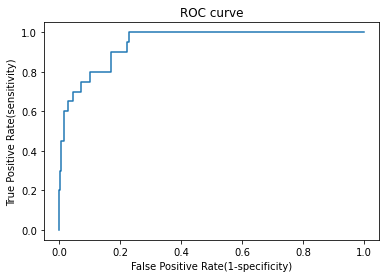

AUC score = 0.9451502732240438


In [38]:
FPR,TPR,Threshold = roc_curve(dfwoNM['Nodule'],dfwoNM['Nodule Balanced Score'])
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate(1-specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.title('ROC curve')
plt.show()
print('AUC score =', metrics.roc_auc_score(dfwoNM['Nodule'],
                                           dfwoNM['Nodule Balanced Score']))

In [39]:
# If we want Sensitivity = 0.90
for i in range(len(TPR)) :
    if TPR[i] >= 0.90 :
        print('Specitivity =', 1-FPR[i])
        print('Threshold =', Threshold[i])
        break

Specitivity = 0.8292349726775956
Threshold = 0.1538417634734108


In [40]:
# finding the most F1 score for nodule  
F1 = []
for i in range(len(TPR)) :
    P = TPR[i]
    T = len(TP(df,'Nodule Balanced Score','Nodule',Threshold[i]))
    F = len(FP(df,'Nodule Balanced Score','Nodule',Threshold[i]))
    if T ==0 or F == 0 :
        F1.append(0)
    else :
        R = T/(T+F)
        F1.append(2*(P*R)/(P+R))
F1 = np.array(F1)
for k in range(len(F1)):
    if F1[k] == F1.max():
        print(k)
        break
print('F1 Max =', F1.max(), 'Sensitivity =',TPR[6], 'Specificity =', 1-FPR[6])


6
F1 Max = 0.4571428571428572 Sensitivity = 0.4 Specificity = 0.9959016393442623


In [41]:
len(FP(df,'Nodule Balanced Score','Nodule',1.869))

0

In [42]:
Threshold[0]

1.8691571239308242

In [43]:
Threshold

array([1.86915712, 0.86915712, 0.74747333, 0.73658615, 0.71432977,
       0.70619257, 0.66235065, 0.65225613, 0.64645902, 0.62856213,
       0.62475005, 0.62172249, 0.61818894, 0.50107777, 0.49665948,
       0.45623248, 0.45601328, 0.33669291, 0.33310659, 0.26381221,
       0.25868684, 0.1554329 , 0.15384176, 0.11899665, 0.11795321,
       0.11639212, 0.11569013, 0.0224349 , 0.02242785])

In [44]:
TPR

array([0.  , 0.05, 0.2 , 0.2 , 0.3 , 0.3 , 0.4 , 0.4 , 0.45, 0.45, 0.55,
       0.55, 0.6 , 0.6 , 0.65, 0.65, 0.7 , 0.7 , 0.75, 0.75, 0.8 , 0.8 ,
       0.9 , 0.9 , 0.95, 0.95, 1.  , 1.  , 1.  ])

In [45]:
FPR

array([0.        , 0.        , 0.        , 0.00136612, 0.00136612,
       0.00409836, 0.00409836, 0.0068306 , 0.0068306 , 0.0136612 ,
       0.0136612 , 0.01502732, 0.01502732, 0.02868852, 0.02868852,
       0.04371585, 0.04371585, 0.07103825, 0.07103825, 0.1010929 ,
       0.1010929 , 0.17076503, 0.17076503, 0.2226776 , 0.2226776 ,
       0.22814208, 0.22814208, 0.68715847, 1.        ])

In [46]:
Createtablefinal(dfwNM)

/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2698/1561048164.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Opacity Group'] = ndf[['Lung Opacity','Mass','Nodule','Atelectasis'
/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2698/1561048164.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Max Balanced Score for Opacity Group'] =  ndf[['Lung Opacity Balanced Score','Mass Balanced Score','Nodule Balanced Score',
/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipyke

,Positive,AUC,PPV,NPV,Sensitivity,Specificity,TP,TN,FP,FN,Sensitivity with Opacity relax
Disease,,,,,,,,,,,
Lung Opacity,63.0,0.903647,0.775862,0.905263,0.714286,0.929730,45.0,172.0,13.0,18.0,0.825397
Mass,2.0,0.849593,0.000000,0.991597,0.000000,0.959350,0.0,236.0,10.0,2.0,1.000000
Nodule,8.0,0.699479,0.055556,0.977273,0.500000,0.716667,4.0,172.0,68.0,4.0,0.625000
Edema,1.0,0.987854,0.041667,1.000000,1.000000,0.906883,1.0,224.0,23.0,0.0,1.000000
Atelectasis,19.0,0.931280,0.451613,0.976959,0.736842,0.925764,14.0,212.0,17.0,5.0,0.894737
Cardiomegaly,51.0,0.976212,0.816327,0.944724,0.784314,0.954315,40.0,188.0,9.0,11.0,NaN
Pleural Effusion,20.0,0.994956,0.666667,1.000000,1.000000,0.956140,20.0,218.0,10.0,0.0,NaN
Tuberculosis,32.0,0.789062,0.273973,0.931429,0.625000,0.754630,20.0,163.0,53.0,12.0,0.843750
Opacity Group,75.0,0.850482,0.549550,0.897810,0.813333,0.710983,61.0,123.0,50.0,14.0,0.813333


In [47]:
df

,Accession Number,Acquisition Date,Month,PID,Mass Balanced Score,Nodule Balanced Score,Edema Balanced Score,Atelectasis Balanced Score,Cardiomegaly Balanced Score,Pleural Effusion Balanced Score,...,Cardiomegaly_sig,Pleural Effusion_sig,Tuberculosis_sig,Opacity Predicted by AI,Abnormal Predicted by AI,Opacity Group,Max Balanced Score for Opacity Group,Predict by AI,Abnormal Group,Max Balanced Score for Abnormal Group
Image Index,,,,,,,,,,,,,,,,,,,,,
1.2.392.200046.100.14.105929304388117274968456057965221538633.png,XR6418198-XR0046,20210716,7,XR6418198,0.165346,0.636160,0.193228,0.391986,0.209324,0.392054,...,0.0,0.0,1.0,1.0,1.0,1.0,0.991909,1.0,1.0,0.991909
1.2.392.200046.100.14.1090452407106003531148523011073405692.png,XR6437573-XR0046,20211215,12,XR6437573,0.044495,0.283493,0.077815,0.058540,0.718785,0.013687,...,0.0,0.0,1.0,1.0,1.0,1.0,0.762184,1.0,1.0,0.762184
1.2.392.200046.100.14.109828079333066932603687765937729442450.png,XR6426459-XR0373,20210911,9,XR6426459,0.067282,0.161142,0.004501,0.027519,0.014822,0.003713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.161142,0.0,0.0,0.161142
1.2.392.200046.100.14.123036775600773791681570423339836158387.png,XR6432932-XR0373,20211107,11,XR6432932,0.185435,0.139441,0.145562,0.145533,0.158370,0.051250,...,0.0,0.0,0.0,1.0,1.0,0.0,0.454977,1.0,0.0,0.454977
1.2.392.200046.100.14.128498105353347301482567868080798411297.png,B6420420-XR0046B,20211119,11,B6420420,0.065298,0.056001,0.012179,0.029267,0.011363,0.006457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.089672,0.0,0.0,0.089672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.3.51.0.7.848608435.35804.59721.45952.55384.6238.21384.png,B6419141-XR0046B,20211113,11,B6419141,0.010749,0.087410,0.014525,0.029582,0.080714,0.004847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.088139,0.0,0.0,0.088139
1.3.51.0.7.855091439.13111.60746.46663.2444.54722.47961.png,B6426282-XR0046B,20211211,12,B6426282,0.023163,0.180805,0.000531,0.032142,0.001456,0.010453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.300519,0.0,0.0,0.300519
1.3.51.0.7.957127114.13513.13378.46633.6895.19615.30155.png,B6416122-XR0046B,20211028,10,B6416122,0.070963,0.706193,0.017494,0.063871,0.062782,0.011017,...,0.0,0.0,0.0,1.0,1.0,0.0,0.994850,1.0,0.0,0.994850


In [48]:
ate = df[df['Nodule']==1.0]

In [49]:
ate[ate['Nodule Balanced Score']<= 0.393508 ]['Lung Opacity Balanced Score']

Image Index
1.2.392.200046.100.14.581839065140483225814626102303054130685.png    0.060862
1.2.392.200046.100.14.60777526226404685861189940245944857511.png     0.062626
1.2.392.200046.100.14.72133522916885201202207030082570014921.png     0.148535
1.2.410.200049.2.1.100.20000123.3.1.20210723132356030.165838.png     0.139535
1.2.410.200049.2.1.100.20000123.3.1.20210831092356377.167726.png     0.033161
1.2.410.200049.2.1.100.20000123.3.1.20211019094830860.173099.png     0.278558
1.2.410.200049.2.263362971898511.3.1.20211013094251001.353417.png    0.580029
1.2.410.200049.2.263362971898511.3.1.20211211082851025.363898.png    0.037683
1.2.410.200049.2.263362971898511.3.1.20211211100511052.363945.png    0.781425
1.3.51.0.7.2651542816.26184.51524.33489.16782.38859.22580.png        0.095396
Name: Lung Opacity Balanced Score, dtype: float64

In [50]:
ate[ate['Nodule Balanced Score']<= 0.393508 ]['Tuberculosis Balanced Score']

Image Index
1.2.392.200046.100.14.581839065140483225814626102303054130685.png    0.084873
1.2.392.200046.100.14.60777526226404685861189940245944857511.png     0.020570
1.2.392.200046.100.14.72133522916885201202207030082570014921.png     0.695261
1.2.410.200049.2.1.100.20000123.3.1.20210723132356030.165838.png     0.005255
1.2.410.200049.2.1.100.20000123.3.1.20210831092356377.167726.png     0.031175
1.2.410.200049.2.1.100.20000123.3.1.20211019094830860.173099.png     0.284263
1.2.410.200049.2.263362971898511.3.1.20211013094251001.353417.png    0.148878
1.2.410.200049.2.263362971898511.3.1.20211211082851025.363898.png    0.003643
1.2.410.200049.2.263362971898511.3.1.20211211100511052.363945.png    0.003643
1.3.51.0.7.2651542816.26184.51524.33489.16782.38859.22580.png        0.009366
Name: Tuberculosis Balanced Score, dtype: float64

In [51]:
Thresholdfile

,Prob Threshold,Confidence Threshold
Disease,,
Atelectasis,0.015219,0.360134
Cardiomegaly,0.239867,0.371898
Edema,0.005094,0.250624
Lung Opacity,0.126226,0.380055
Mass,0.014742,0.231774
Nodule,0.058678,0.393508
Pleural Effusion,0.025181,0.166954
Tuberculosis,0.366158,0.340682


In [52]:
np.array(Thresholdfile['Prob Threshold'])

array([0.0152193 , 0.23986673, 0.00509423, 0.12622564, 0.01474213,
       0.05867757, 0.02518052, 0.36615834])